# Predicting the Result of a soccer match

I love soccer and I know a lot of data is involved in a game. So I wanted to see if I could predict the outcome of a match using a machine learning algorithm. I will be predicting premier league matches for the top 6 teams

To apply machine learning algorithm I would need to do a few steps before that. All the steps I will be doing are listed below.

## Steps
### 1. Collection Data 
### 2. Wrangling Data 
### 3. Analysing Data
### 4. Predicting the outcomde

## 1. Collecting Data 

The data was collected from kaggle.
I found 4 seasons worth of data of from kaggle.
Each season had two files in json format. A single row from two files for 1 season is shown below

In [115]:
import json
# So the file has basic data for a particural team. This file does not contain most of the data
with open('datafile/season14-15/season_match_stats.json', 'r') as in_file:
            match_data = json.load(in_file)
        
for match_id in match_data:
    print(match_data[line])
    break


{'home_team_id': '13', 'away_team_id': '162', 'home_team_name': 'Arsenal', 'away_team_name': 'Crystal Palace', 'date_string': '16/08/2014 17:30:00', 'half_time_score': '1 : 1', 'full_time_score': '2 : 1'}


In [116]:
# This file contains all of the data, a sigle row has all the game events, like fouls and possesion.
with open('datafile/season14-15/season_stats.json', 'r') as in_file:
            match_stats = json.load(in_file)
for match_id in match_stats:
    print(match_stats[line])
    break

{'13': {'team_details': {'team_id': '13', 'team_name': 'Arsenal', 'team_rating': '7.015', 'date': '16/08/2014'}, 'aggregate_stats': {'att_goal_low_left': '1', 'won_contest': '12', 'possession_percentage': '76', 'total_throws': '21', 'att_miss_high_left': '1', 'blocked_scoring_att': '3', 'total_scoring_att': '14', 'att_sv_low_left': '2', 'total_tackle': '26', 'att_miss_high_right': '1', 'aerial_won': '23', 'att_miss_right': '1', 'att_sv_low_centre': '1', 'aerial_lost': '17', 'accurate_pass': '640', 'total_pass': '730', 'won_corners': '9', 'shot_off_target': '5', 'ontarget_scoring_att': '6', 'goals': '2', 'att_miss_left': '2', 'fk_foul_lost': '13', 'att_sv_low_right': '1', 'att_goal_low_centre': '1'}, 'Player_stats': {'Wojciech Szczesny': {'player_details': {'player_id': '73379', 'player_name': 'Wojciech Szczesny', 'player_position_value': '1', 'player_position_info': 'GK', 'player_rating': '5.81'}, 'Match_stats': {'touches': '20', 'saves': '1', 'total_pass': '13', 'aerial_won': '1', 'fo

## 2. Wrangling Data 

So the data above is unstructured and is not so usefull for analysing.
Therefore I did some wrangling with the data to produce a csv file. 
This file contains all the important features that I believe will be important in predicting the outcome.

##### Important Note -:
I added an extra column in the wrangled data, the extra column is "result". This column has three possible values -:
1. 0 -> Team lost the match
2. 1 -> The match was a draw
3. 2 -> The team won the match


In [117]:
# I will display 5 rows of the wrangled data 
import pandas as pd
data = pd.read_csv('wrangled_data.csv', usecols=range(1,12))
data.head()

,accurate_pass,corners,fouls,goals,possession,red_card,result,shots_off_target,total_offside,total_pass,total_tackle
0,551,3,7,3,61.4,0,2,4,1,668,19
1,464,8,11,2,63.3,0,2,9,2,530,23
2,258,2,16,6,38.7,0,2,1,1,355,30
3,508,7,12,4,55.2,0,2,12,0,573,17
4,343,2,12,1,41.5,0,1,2,1,409,21


Now the data is more readable and useful. From now on we will be using this data.

## 3. Analysing Data 

Now I will try to analyse the data and see if I am able to find something of significane

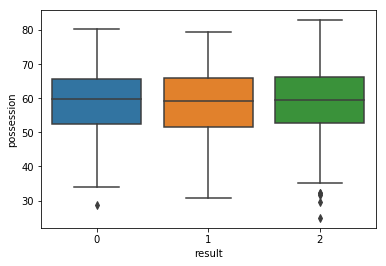

In [118]:
# I am really interested in possesion so I want to see the possesion variability for the 3 possible outcomes 
import seaborn as sns
ax = sns.boxplot(x="result", y="possession", data=data)


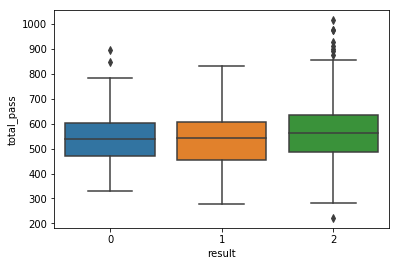

In [119]:
import seaborn as sns
ax = sns.boxplot(x="result", y="total_pass", data=data)

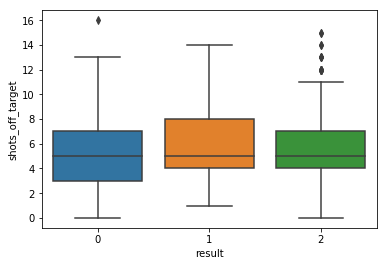

In [120]:
import seaborn as sns
ax = sns.boxplot(x="result", y="shots_off_target", data=data)

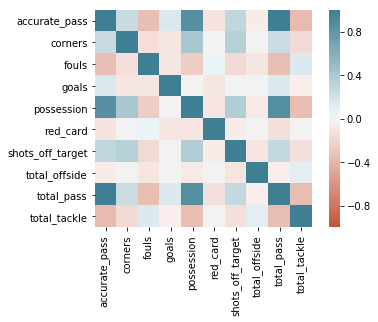

In [121]:
# Correlation Matrix 
corr = data_without_result.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [122]:
data_red_card = data.loc[data['red_card'] >= 1]
#data_red_card.loc[data_red_card['result'] == 2]
loss_red_card = (len(data_red_card.loc[data_red_card['result'] == 1])/len(data_red_card))
win_red_card = (len(data_red_card.loc[data_red_card['result'] == 2])/len(data_red_card))
draw_red_card = (len(data_red_card.loc[data_red_card['result'] == 0])/len(data_red_card))
print('Games win if red card {0:0.2f}%'.format(float(win_red_card)*100))
print('Games draw if red card {0:0.2f}%'.format(float(draw_red_card)*100))
print('Games loss if red card {0:0.2f}%'.format(float(loss_red_card)*100))

Games win if red card 31.37%
Games draw if red card 43.14%
Games loss if red card 25.49%


## 3. Predicting  

Now that i have completed the analysis I will apply at leat two machine learning algoritms to predict the outcome of a game


In [123]:
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
data = data.sample(frac=1).reset_index(drop=True)
X_train = data.drop('result',1).iloc[:901,:]
X_test = data.drop('result',1).iloc[901:,:]
y_train = data['result'].iloc[:901]
y_test = data['result'].iloc[901:]

In [124]:

def logistic_regression(X_train,y_train,X_test,y_test):
    y_train = y_train.to_numpy()
    X_train= X_train.to_numpy()
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train = std_scale.transform(X_train)
    X_test = std_scale.transform(X_test)
    clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=300,
                         multi_class='multinomial').fit(X_train, y_train)
    print(pd.DataFrame(clf.predict_proba(X_test)))
    print(clf.score(X_test, y_test))
logistic_regression(X_train,y_train,X_test,y_test)

           0         1         2
0   0.012470  0.042432  0.945098
1   0.009564  0.026429  0.964007
2   0.001120  0.008107  0.990773
3   0.005036  0.026287  0.968677
4   0.267871  0.338495  0.393635
5   0.521314  0.415834  0.062852
6   0.374233  0.562595  0.063172
7   0.649303  0.284936  0.065761
8   0.486871  0.469190  0.043939
9   0.509775  0.437081  0.053144
10  0.010492  0.041380  0.948128
0.5454545454545454


/Users/sarthakbabbar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [125]:
def random_forest(X_train,y_train,X_test,y_test):
    y_train = y_train.to_numpy()
    X_train= X_train.to_numpy()
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train = std_scale.transform(X_train)
    X_test = std_scale.transform(X_test)
    clf = RandomForestClassifier(n_estimators=100, max_depth=100,
                             random_state=0)
    clf.fit(X_train,y_train)
    print(pd.DataFrame(clf.predict_proba(X_test)))
    print(clf.score(X_test, y_test))
random_forest(X_train,y_train,X_test,y_test)

       0     1     2
0   0.01  0.18  0.81
1   0.07  0.07  0.86
2   0.04  0.02  0.94
3   0.05  0.05  0.90
4   0.23  0.17  0.60
5   0.31  0.53  0.16
6   0.47  0.42  0.11
7   0.61  0.33  0.06
8   0.64  0.34  0.02
9   0.49  0.44  0.07
10  0.01  0.05  0.94
0.7272727272727273


/Users/sarthakbabbar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
